In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys

In [5]:
def get_distance(p1, p2):
    """
    input : two coordinates of two positions
    output : euclidean distance between two points.
    """
    z = np.array(p1)-np.array(p2)
    return np.sqrt(np.dot(z, z))


def k_points(n):
    """
    input : n is the number of groups
    output : a list of randomly generated position of each group.
    
    points indicates current data points that belongs to each group.
    curr indicates the current position and prev is previous.
    """
    return [{'prev':None, 'curr':(np.random.randint(-4, 4, 1)[0],np.random.randint(-4, 4, 1)[0]), 'points':[]} for _ in range(n)]


def update_position():
    """
    Set each group's new position to the center (or the mean) of points that it has currently.
    After that, reset points since previous and current points don't depend on each other.
    """
    dat = {}
    for i, point in enumerate(p):
        point['prev'] = point['curr']
        point['curr'] = np.mean(point['points'], axis=0) if len(point['points']) > 0 else point['prev']
        dat[i] = np.array(point['points'])
        point['points'] = []
    return dat

def done_moving():
    """
    output : boolean
    
    Check if it needs another iteration.
    It will return false if even one of k points have different prev and curr.
    """
    for point in p:
        if np.any(point['curr'] != point['prev']):
            return False
    return True


def assign_points(x, y):
    """
    input : data points for training
    
    Compute each distance between k points and given x1, y1 coordinate and assign it to the closest point.
    """
    for x1, y1 in zip(x, y):
        
        dist = [get_distance(point['curr'], [x1,y1]) for point in p]
        
        # Get the closest kth point from current x,y
        closest_point = dist.index(min(dist))
        p[closest_point]['points'].append([x1,y1])
    


In [6]:
size = 200
x = np.random.normal(0, 2, size)
y = np.random.normal(-0.5, 3, size)
colors = ['r', 'blue', 'g', 'black', 'y']

Done at 8th iteration


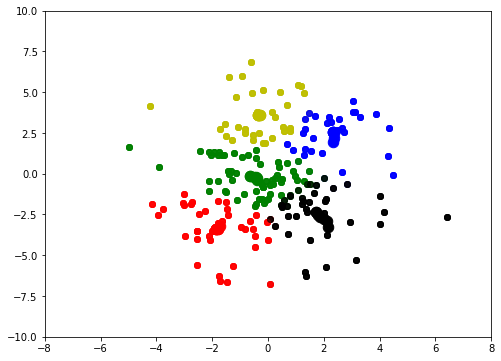

In [13]:
from celluloid import Camera
p = k_points(5)
i = 1
fig, ax = plt.subplots(figsize=(8, 6))
camera = Camera(fig)

ax.set_xlim(-8, 8)
ax.set_ylim(-10, 10)

while not done_moving():
        
    assign_points(x, y)
    points = update_position()

    for j in range(len(p)):
        ax.scatter(p[j]['curr'][0], p[j]['curr'][1], s=110, c=colors[j])
        if len(points[j]) > 0:
            ax.scatter(points[j][:,0], points[j][:,1], c=colors[j], alpha=0.4)
        
    i += 1
    camera.snap()
    
print("Done at {}th iteration".format(i))

In [14]:
anim = camera.animate()
anim.save('anim1.gif', writer='imagemagick')